In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO
from scipy.optimize import curve_fit

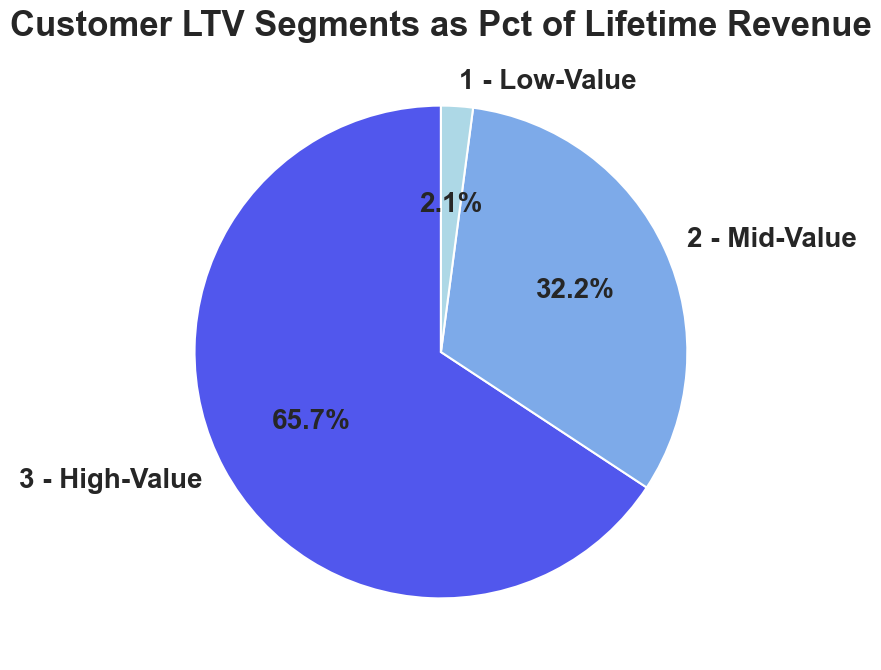

In [3]:
### 1_customer_segmentation ###

# Use Seaborn dark theme
sns.set_theme(style="dark")

# Data
segments = ["3 - High-Value", "2 - Mid-Value", "1 - Low-Value"]
ltv_percentage = [65.7319, 32.1825, 2.0855]

# Colors: darker blue for higher value
colors = ["#5157ED", "#7DAAE9", "#ADD8E6"]  # high, mid, low

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    ltv_percentage,
    labels=segments,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', "linewidth": 1.5},
    textprops={'fontsize': 20, 'fontweight': 'bold'}  # make labels bold and larger
)
ax.set_title("Customer LTV Segments as Pct of Lifetime Revenue", fontsize=25, fontweight="bold")
plt.show()


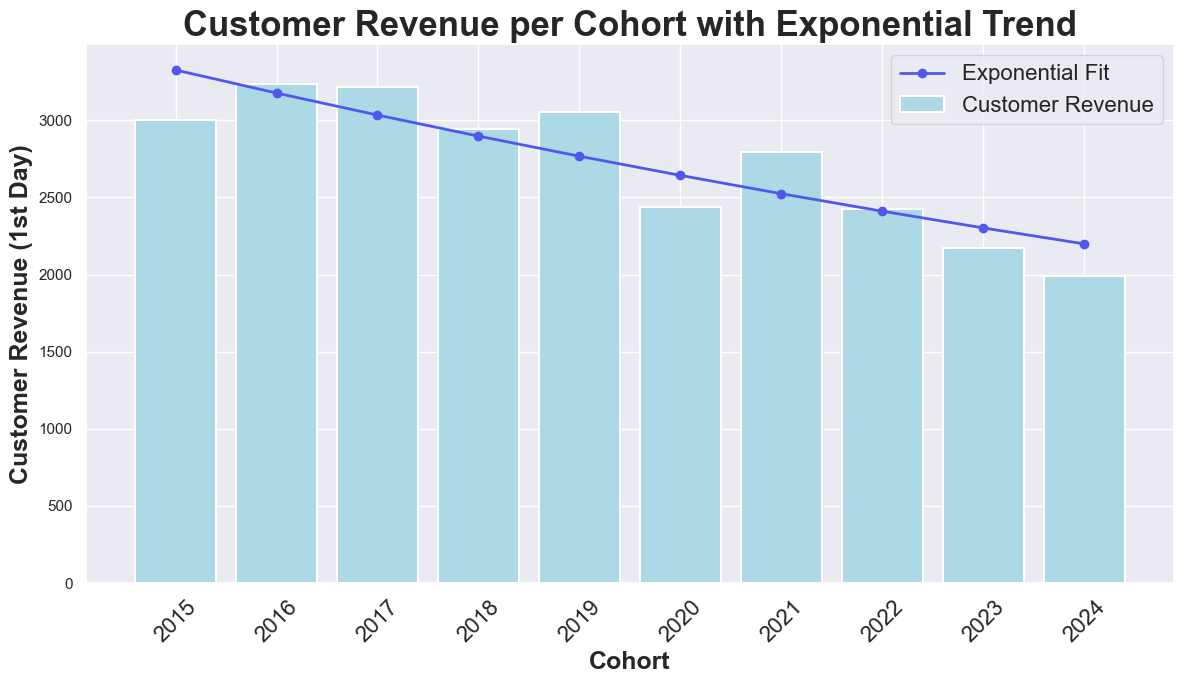

In [4]:
### 2_cohort_analysis ###

# CSV data
data = """cohort,total_revenue_1st_day,total_customers,customer_revenue_1st_day
2015,8470302.34893414,2825,2998.3371146669524
2016,10985782.236630179,3397,3233.01419559452
2017,13090564.949501628,4068,3217.9363199364866
2018,21925381.709274735,7446,2943.7945366910226
2019,23684581.498570375,7755,3053.7108688203166
2020,7390330.587376449,3031,2437.4441251241587
2021,13032249.280742628,4663,2793.622568219213
2022,21832794.053053845,9010,2422.635824795145
2023,12801716.549185246,5890,2171.9912706456134
2024,2793517.1618923238,1402,1992.52294000879
"""

# Load into DataFrame
df = pd.read_csv(StringIO(data))

# Set dark theme
sns.set_theme(style="darkgrid", palette="deep")

# Numeric x for bar positions and fitting
x_numeric = np.arange(len(df))
y_data = df['customer_revenue_1st_day'].values

# Exponential function
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Fit exponential curve
params, _ = curve_fit(exp_func, x_numeric, y_data, p0=(3000, -0.05))
y_fit = exp_func(x_numeric, *params)

# Plot
plt.figure(figsize=(12, 7))

# Bar chart (using numeric x positions)
plt.bar(x_numeric, df['customer_revenue_1st_day'], color='lightblue', label='Customer Revenue', edgecolor='white', linewidth=1.5)

# Exponential line
plt.plot(x_numeric, y_fit, color='#5157ED', linewidth=2, marker='o', label='Exponential Fit')

# Set cohort labels
plt.xticks(x_numeric, df['cohort'], rotation=45, fontsize=16)
plt.ylabel('Customer Revenue (1st Day)', fontweight="bold", fontsize=18)
plt.xlabel('Cohort', fontweight="bold", fontsize=18)
plt.title('Customer Revenue per Cohort with Exponential Trend', fontweight="bold", fontsize=25)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()


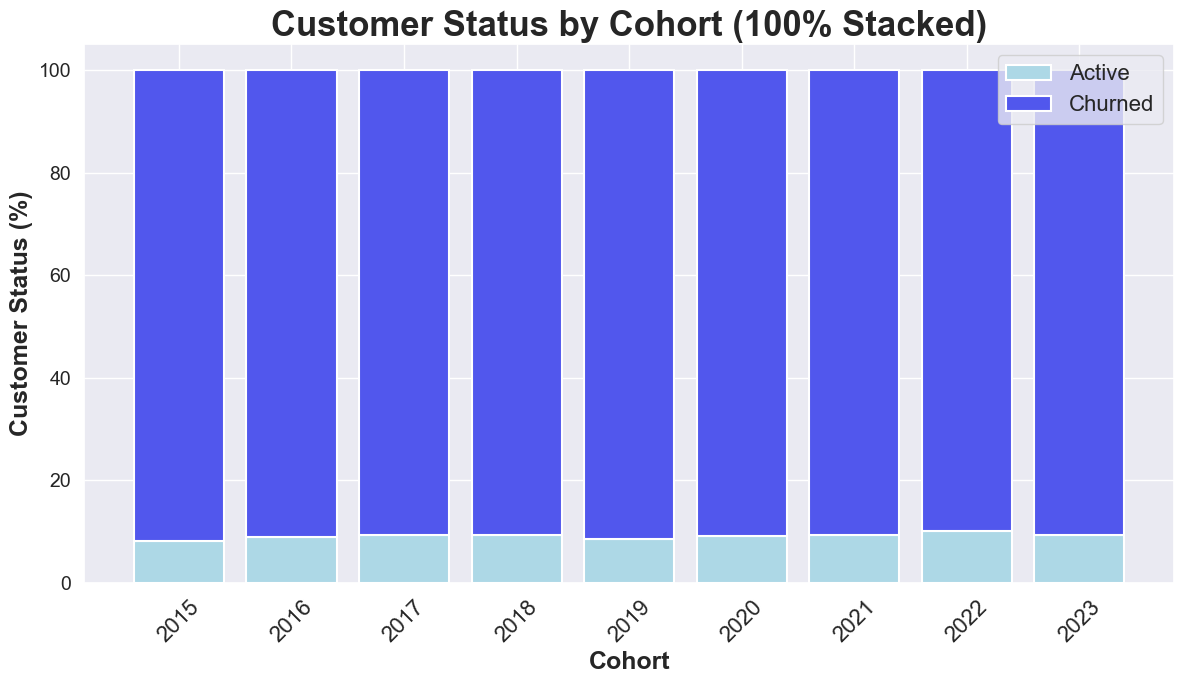

In [8]:
### 3_customer_retention ###

# CSV data (customer status percentages)
data = """customer_status,cohort,num_customers,total_customers,status_percentage
Churned,2015,2591,2825,91.7168141592920354
Active,2015,234,2825,8.2831858407079646
Active,2016,302,3397,8.8901972328525169
Churned,2016,3095,3397,91.1098027671474831
Churned,2017,3686,4068,90.6096361848574238
Active,2017,382,4068,9.3903638151425762
Active,2018,694,7446,9.3204405049691109
Churned,2018,6752,7446,90.6795594950308891
Churned,2019,7085,7755,91.3604126370083817
Active,2019,670,7755,8.6395873629916183
Active,2020,277,3031,9.1388980534477070
Churned,2020,2754,3031,90.8611019465522930
Active,2021,438,4663,9.3930945743083852
Churned,2021,4225,4663,90.6069054256916148
Churned,2022,8091,9010,89.8002219755826859
Active,2022,919,9010,10.1997780244173141
Churned,2023,4311,4758,90.6052963430012610
Active,2023,447,4758,9.3947036569987390
"""

# Load into DataFrame
df = pd.read_csv(StringIO(data))

# Pivot for stacked bar chart
df_pivot = df.pivot(index="cohort", columns="customer_status", values="status_percentage").fillna(0)

# Create figure
plt.figure(figsize=(12, 7))

# Plot stacked bar chart
bottom_vals = np.zeros(len(df_pivot))
colors = {"Active": "lightblue", "Churned": "#5157ED"}  # Match your style

for status in ["Active", "Churned"]:
    plt.bar(
        df_pivot.index,
        df_pivot[status],
        bottom=bottom_vals,
        color=colors[status],
        edgecolor="white",
        linewidth=1.5,
        label=status,
    )
    bottom_vals += df_pivot[status].values

# Labels and formatting
plt.xticks(df_pivot.index, df_pivot.index, rotation=45, fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel("Customer Status (%)", fontweight="bold", fontsize=18)
plt.xlabel("Cohort", fontweight="bold", fontsize=18)
plt.title("Customer Status by Cohort (100% Stacked)", fontweight="bold", fontsize=25)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()